In [38]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.model import stepmodel
from quetzal.io import excel
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.plot

%matplotlib inline

In [39]:
path_1 = r'../../model/polycentric'
path_2 = r'../../model/polycentric1'

### In volumes 

In [40]:
sm1_vol = stepmodel.read_zippedpickles(path_1+'/assignment')
sm2_vol = stepmodel.read_zippedpickles(path_2+'/assignment')

sm1_vol.volumes.set_index(['origin', 'destination'], inplace=True)
sm2_vol.volumes.set_index(['origin', 'destination'], inplace=True)

comp_volumes=pd.merge(sm1_vol.volumes.drop('car_owner', axis=1), sm2_vol.volumes.drop('car_owner', axis=1), 
                      left_index=True, right_index=True, suffixes=('_1', '_2'))

zone_to_transit: 100%|█████████████████████████████████████████████████████████████████| 46/46 [00:02<00:00, 18.48it/s]


In [41]:
comp_volumes

todos_1  pt_share_1        pt_1  \
origin           destination                                              
k4_highschool    k4_highschool       672.224987    0.363826  244.573014   
                 k8_asenako_wefecho    0.008634    0.473788    0.004091   
                 zone_201              0.001307    0.766990    0.001003   
                 zone_161              0.000000    0.641612    0.000000   
                 k7_sefer_aned         0.017068    0.518939    0.008857   
...                                         ...         ...         ...   
k9_gende_ticharo zone_205              0.004129    0.826428    0.003412   
                 k2_eshet_hotel        0.803986    0.583759    0.469334   
                 zone_142             28.395465    0.358792   10.188064   
                 k1_gender_reye        0.599074    0.828186    0.496144   
                 k9_gende_ticharo    106.082895    0.363826   38.595729   

                                        todos_2  pt_share_2        pt_2  
origin           destination                                             
k4_highschool    k4_highschool       672.224987    0.363826  244.573014  
                 k8_asenako_wefecho    0.008634    0.473788    0.004091  
                 zone_201              0.001307    0.766990    0.001003  
                 zone_161              0.000000    0.641612    0.000000  
                 k7_sefer_aned         0.017068    0.518939    0.008857  
...                                         ...         ...         ...  
k9_gende_ticharo zone_205              0.004129    0.826428    0.003412  
                 k2_eshet_hotel        0.803986    0.583759    0.469334  
                 zone_142             28.395465    0.358792   10.188064  
                 k1_gender_reye        0.599074    0.828186    0.496144  
                 k9_gende_ticharo    106.082895    0.363826   38.595729  

[46225 rows x 6 columns]

In [42]:
comp_volumes.groupby(level='origin').sum()

,todos_1,pt_share_1,pt_1,todos_2,pt_share_2,pt_2
origin,,,,,,
k0_new_industrial_zone,943.971757,166.046292,451.560381,943.971757,166.046292,451.560381
k1_abdulahi_mussa,751.041302,157.573480,361.657732,751.041302,157.573480,361.657732
k1_agedalis,787.839035,161.170335,405.507945,787.839035,161.170335,405.507945
k1_gender_reye,5358.229269,155.462988,2652.646867,5358.229269,155.462988,2652.646867
k1_genede_amerach,1912.422735,156.456286,890.244377,1912.422735,156.456286,890.244377
...,...,...,...,...,...,...
zone_210,1069.792201,138.807370,401.109021,1069.792201,138.807370,401.109021
zone_211,0.000000,117.434632,0.000000,0.000000,117.434632,0.000000
zone_212,0.000000,82.290605,0.000000,0.000000,82.290605,0.000000


On observe de différences dès l'étape de distribution (todos_1 vs. todos_2). Les parts modales PT ne changent pas trop (module modal split), mais on constate des différences. Lorsque la distribution est faite à partir des temps entre les zones (matrice d'impédence dépend du time entre deux zones), le problème remonte au niveau de pathfinders 

### In pathfinders 

In [43]:
sm1_ptf = stepmodel.read_zippedpickles(path_1+'/aon_pathfinder')
sm2_ptf = stepmodel.read_zippedpickles(path_2+'/aon_pathfinder')

sm1_ptf.pt_los.set_index(['origin', 'destination'], inplace=True)
sm2_ptf.pt_los.set_index(['origin', 'destination'], inplace=True)

comp_times=pd.merge(sm1_ptf.pt_los['gtime'], sm2_ptf.pt_los['gtime'], 
                    left_index=True, right_index=True, suffixes=('_1', '_2'))

zone_to_transit: 100%|█████████████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 23.65it/s]


In [44]:
comp_times['delta'] = comp_times['gtime_1'] - comp_times['gtime_2']

In [45]:
comp_times

gtime_1      gtime_2  delta
origin           destination                                        
k4_highschool    k4_highschool          0.000000     0.000000    0.0
                 k8_asenako_wefecho  2248.733778  2248.733778    0.0
                 zone_201            5165.228899  5165.228899    0.0
                 zone_161            4693.539148  4693.539148    0.0
                 k7_sefer_aned       1439.994598  1439.994598    0.0
...                                          ...          ...    ...
k9_gende_ticharo zone_205            5367.568489  5367.568489    0.0
                 k2_eshet_hotel      2459.993110  2459.993110    0.0
                 zone_142            1235.312619  1235.312619    0.0
                 k1_gender_reye      3168.046184  3168.046184    0.0
                 k9_gende_ticharo       0.000000     0.000000    0.0

[46225 rows x 3 columns]

In [46]:
comp_times['delta'].min()

0.0

In [47]:
comp_times['delta'].sum()

0.0

Tous les gtimes son plus faibles dans le premier pathfinder que dans le deuxième... simple hasard ? problème de réinitialisation du pathfinder ?

In [48]:
raster = rasterio.open(r'../../inputs/tiff/20137.tiff')

In [49]:
origin, destination ='k1_gender_reye', 'zone_139'

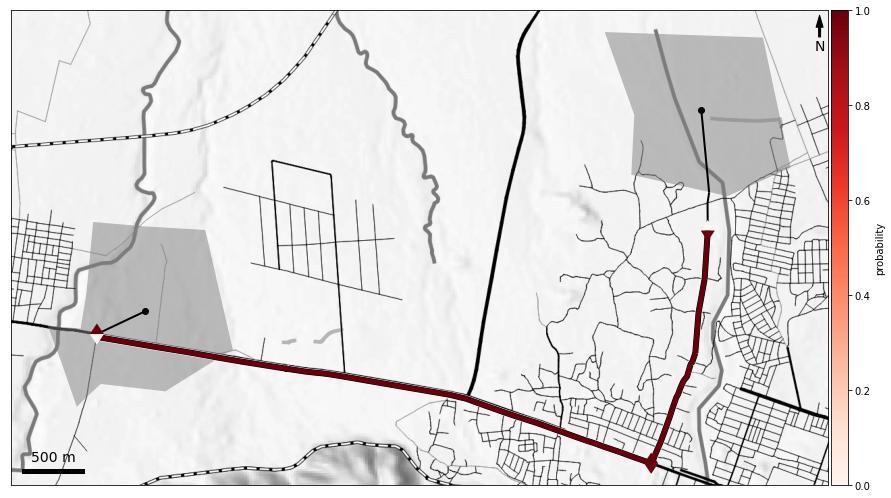

In [50]:
plot_1 = sm1_ptf.plot_strategy(
        origin, destination, road=True, cmap='Reds', ax=None , walk_on_road=True,
        figsize=(15, 10), legend='right', legend_kwds={'orientation': 'vertical', 'label': 'probability'},
        basemap_raster=raster, scalebar=True, north_arrow=True
    )

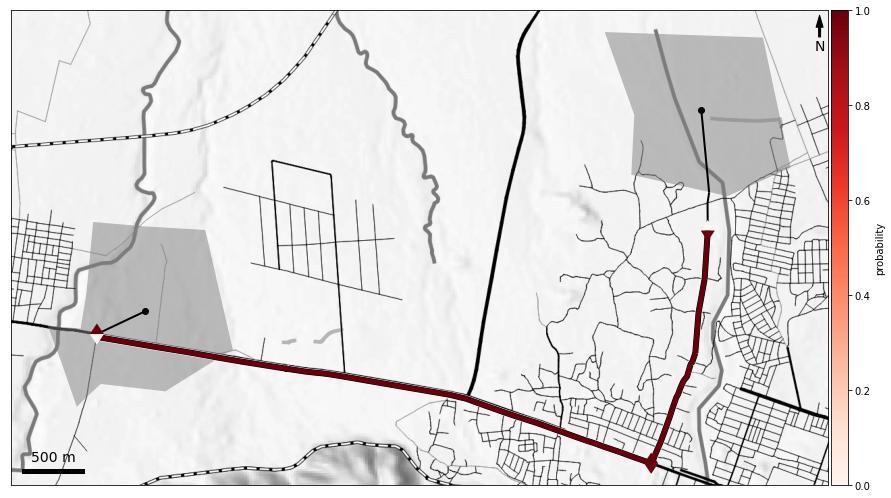

In [51]:
plot_2 = sm2_ptf.plot_strategy(
        origin, destination, road=True, cmap='Reds', ax=None , walk_on_road=True,
        figsize=(15, 10), legend='right', legend_kwds={'orientation': 'vertical', 'label': 'probability'},
        basemap_raster=raster, scalebar=True, north_arrow=True
    )

In [52]:
dest = 'zone_186'

In [53]:
len(sm1_ptf.optimal_strategy_sets[dest])

6317

In [54]:
len(sm2_ptf.optimal_strategy_sets[dest])

6317

In [55]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

len(intersection(sm1_ptf.optimal_strategy_sets[dest],sm2_ptf.optimal_strategy_sets[dest]))

6317

On observe que les optimal_strategy_sets pour une même destination ne sont pas les mêmes (même si les deux ont le même nombre d'élements)